In [1]:

import datetime as dt

from IPython.core.display import HTML, display
import os
def hide_code(auto=False):
    """
    Provides a button to click to hide the code 
    
    Parameters
    ----------
    auto: (boolean) whether to hide the code when this function is called

    Notes
    -----
    Call the function at the end of a cell or
    use the display function from IPython.core.display display the HTML
    """
    auto_str = '//' if not auto else ''
    return HTML('''<script>
    code_show=true; 
    function code_toggle() {{
     if (code_show){{
     $('div.input').hide();
     }} else {{
     $('div.input').show();
     }}
     code_show = !code_show
    }}
    {auto}$(document).ready(code_toggle);
    </script>
    <a href="javascript:code_toggle()">Code AK {year}</a>.'''.format(
        auto=auto_str, year=dt.datetime.now().year))

# 1.Analysing feature behaviour based on synthetic data

In [2]:
import json
import pandas as pd
import numpy as np
np.set_printoptions(precision=3, suppress=True)
import os
import matplotlib.pyplot as plt
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns

In [3]:
##helper functions for plotting##
def plot_set(df):
    for i in [1,5,10,100]:
        x= np.asarray(df.iloc[:,10*i].expanding().mean())
        plt.plot(x,linestyle='--', label =str(10*i)+'-slices')

def plot_single_sequence(df, seq_no):
    x= np.asarray(df.iloc[:,seq_no].index)
    y=df.iloc[:,seq_no].expanding(10).mean()
    error=y.expanding(seq_no).std()
    plt.plot(x, y, 'k-',linewidth=0.9)
    plt.fill_between(x, y-error, y+error, alpha=0.8, edgecolor='#1B2ACD', facecolor='#fff4f2',
                         linewidth=0.4, linestyle='dashdot', antialiased=False)
    
    plt.legend([str(seq_no)+'-th time slice'])

def plot_single_sequence_error(df, seq_no):
    x= np.asarray(df.iloc[:,seq_no].index)
    y=df.iloc[:,seq_no].expanding(1).mean()
    error=y.expanding(seq_no).std()
    plt.plot(x, error, linestyle='dashdot',linewidth=0.9, color='r')
    plt.legend([str(seq_no)+'-th time slice '])

In [4]:
hide_code()

NameError: name 'hide_code' is not defined

### Two states with skewed transition matrix favouring one state  and static parameters that are sufficiently apart. We create state sequences of fixed length and for every fixed length sequence we generate M copies of observation data from the observation distribution. 


In [5]:
doc_path= ('/home/ak/Documents/Data/')
figures_path= ('/home/ak/Documents/Research/QFPaper/paper/figures/')


In [6]:
ticker = 'SYNT_2states'
main_path = '/home/ak/Documents/Data/features_models/'
file_name = 'synthetic_study_' + str(ticker)


In [7]:
#search only for npy files+make a list --> will use this later
npy_files=[s for s in os.listdir(doc_path+'mySYNT/features/') if s.endswith('.npy')]

#load bot matrix and vector valued
ksi_metrics =np.load(main_path+'ksi_metrics_long.npy').item()
im_metrics =np.load(main_path+'im_metrics_long.npy').item()
fischer_polar =np.load(main_path+'fischer_polar_long.npy')

dfs = [ksi_metrics, im_metrics, fischer_polar]
metrics_keys=ksi_metrics.keys()
metrics_keys

for i in range(0,2):
    print i

0
1


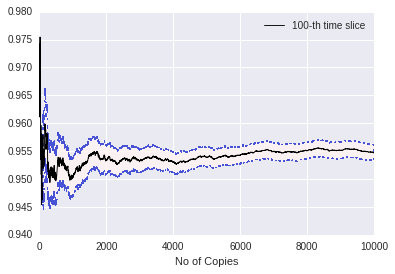

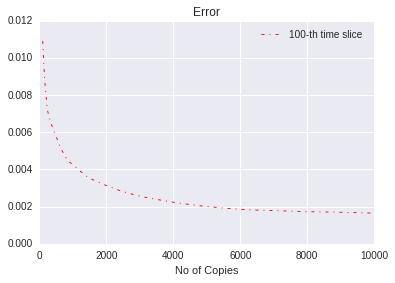

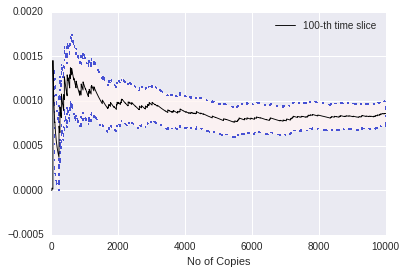

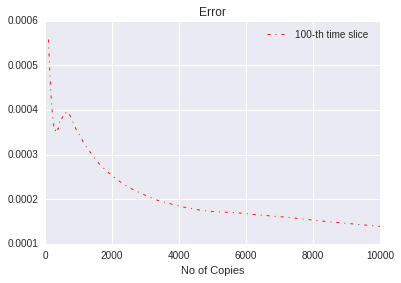

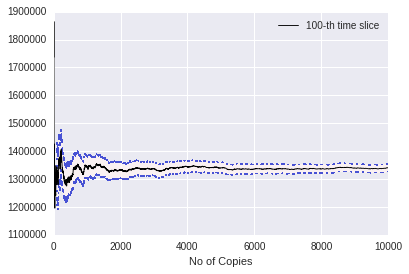

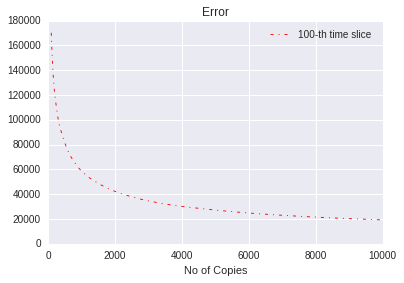

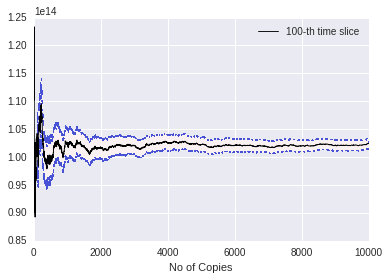

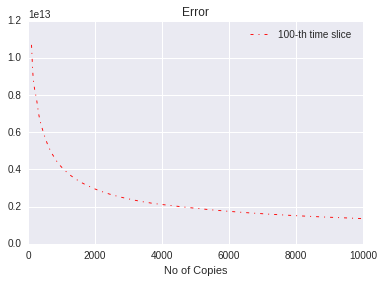

In [111]:
i=1
k=0
for i in range(0,2):
    for k in range(0,2):
        df_p=pd.DataFrame(dfs[i][metrics_keys[k]])
        plot_single_sequence(df_p, 100)
        plt.xlabel('No of Copies')
        plt.savefig(figures_path+str(i)+str(k)+'.png') 
        plt.show()
        plot_single_sequence_error(df_p,100)
        plt.title('Error')   
        plt.xlabel('No of Copies')
        plt.savefig(figures_path+str(i)+str(k)+'.png') 
        plt.show()

In [8]:
no_paths =ksi_metrics[metrics_keys[0]].shape[0]
seq_length=ksi_metrics[metrics_keys[0]].shape[1]
print "In this case, the number of copies (rows):", no_paths
print "the length of each sequence (columns):", seq_length

In this case, the number of copies (rows): 10000
the length of each sequence (columns): 3999


### Information Matrix

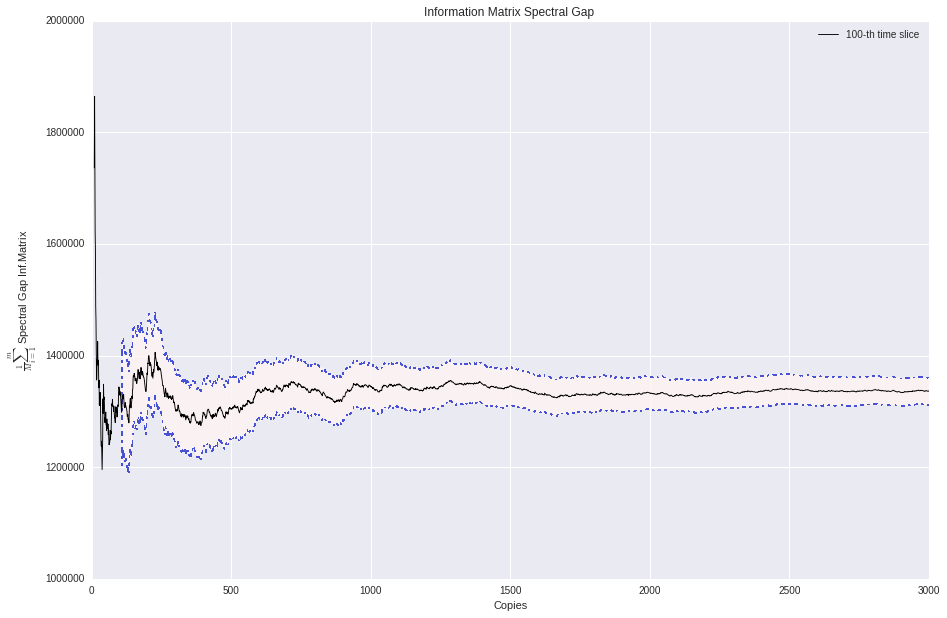

In [9]:
## Information Matrix Spectral Gap
plt.figure(figsize=(15,10)) 
df=pd.DataFrame(dfs[1][metrics_keys[0]])
plot_single_sequence(df, 100)
plt.ylabel(r'$\frac{1}{M}\sum_{i=1}^{m}$ Spectral Gap Inf.Matrix')
plt.xlabel('Copies')
plt.title('Information Matrix Spectral Gap ')
plt.xlim(0, 3000)
plt.ylim(1000000, 2000000)
plt.savefig(figures_path+'im_spectral_gap.png')   # save the figure to file
plt.show()





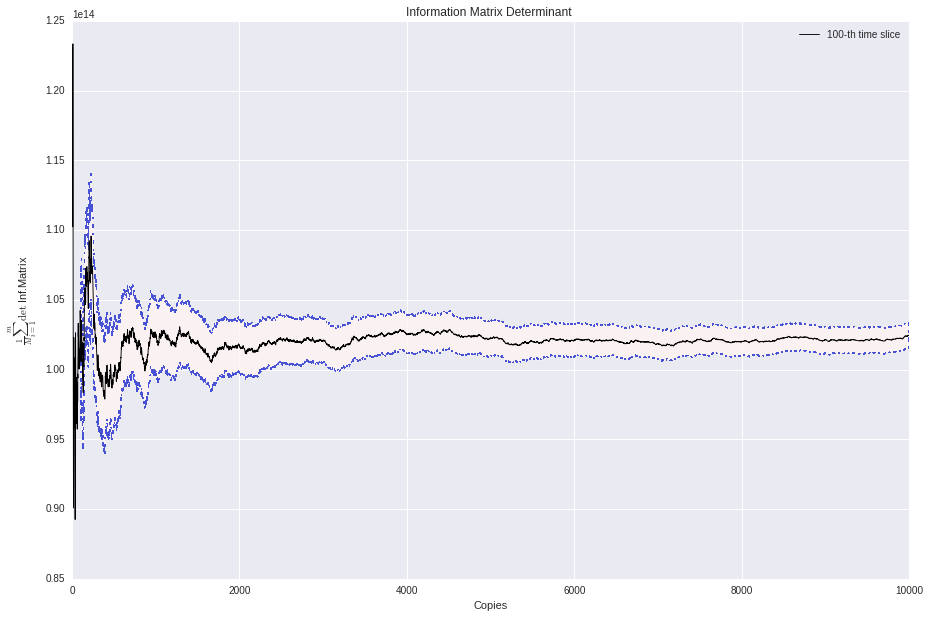

In [10]:
plt.figure(figsize=(15,10)) 
df_=pd.DataFrame(dfs[1][metrics_keys[1]])
plot_single_sequence(df_, 100)
plt.xlabel('Copies')
plt.ylabel(r'$\frac{1}{M}\sum_{i=1}^{m} \det$ Inf.Matrix')
plt.title('Information Matrix Determinant ')
plt.savefig(figures_path+'im_determinant.png')   # save the figure to file
plt.show()

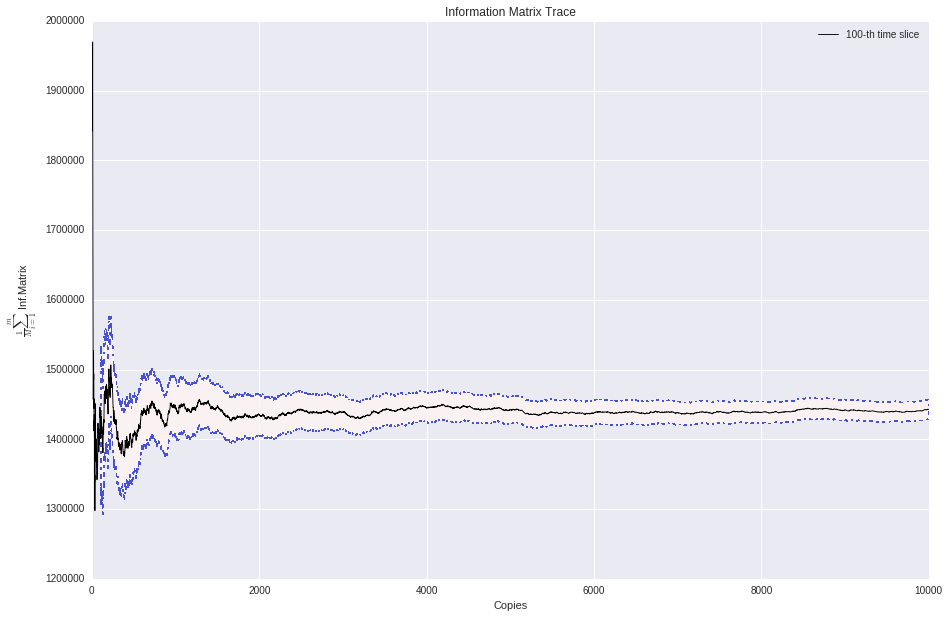

In [11]:
plt.figure(figsize=(15,10)) 
df_=pd.DataFrame(dfs[1][metrics_keys[2]])
plot_single_sequence(df_, 100)
plt.ylabel(r'$\frac{1}{M}\sum_{i=1}^{m}$ Inf.Matrix')
plt.xlabel('Copies')
plt.title('Information Matrix Trace')
plt.savefig(figures_path+'im_trace.png')   # save the figure to file
plt.show()

In [12]:
# df=pd.DataFrame(dfs[0][metrics_keys[0]])

# plot_single_sequence(df, 100)
# plt.ylabel(r'$\frac{1}{M}\sum_{i=1}^{m}$ $\xi_{i}$')
# plt.show()
# df=pd.DataFrame(dfs[1][metrics_keys[0]])
# plot_single_sequence(df, 100)
# plt.show()


### StD for expanding window 100.

In [13]:
metrics_keys

['spectral', 'determ', 'trace']

In [14]:
no=1
print(metrics_keys[no])
determ = pd.DataFrame(ksi_metrics[metrics_keys[no]])
spectral= pd.DataFrame(ksi_metrics[metrics_keys[0]])
trace= pd.DataFrame(ksi_metrics[metrics_keys[2]])
# cumsum_determ=determ.cumsum(axis=1)


determ


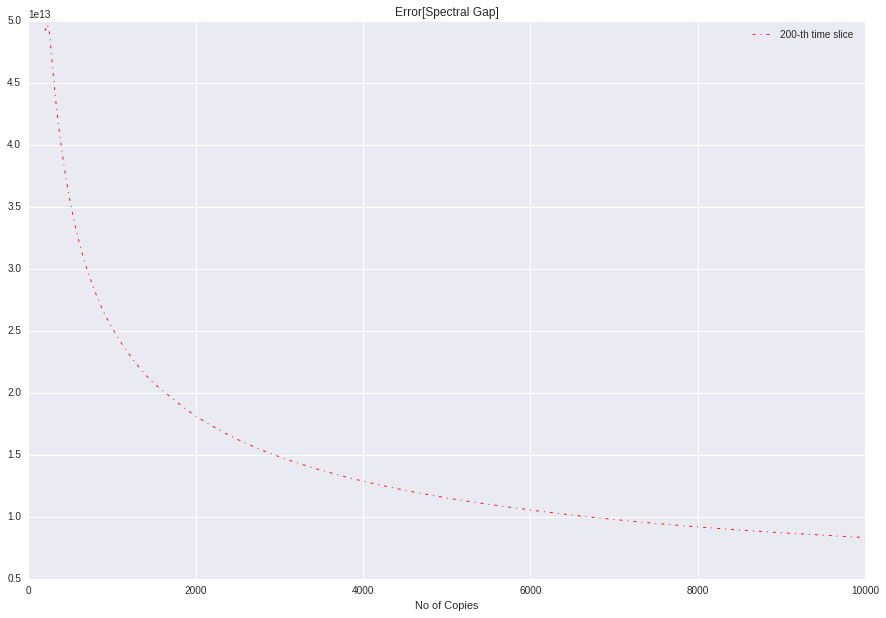

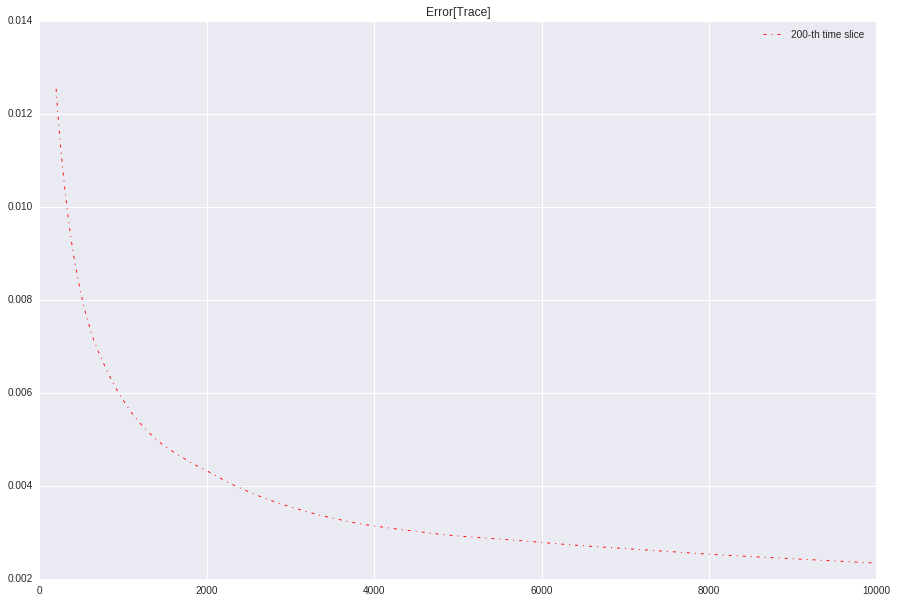

In [15]:
plt.figure(figsize=(15,10)) 
df_spectral = pd.DataFrame(im_metrics[metrics_keys[1]])
plot_single_sequence_error(df=df_spectral, seq_no=200)
plt.title('Error[Spectral Gap]')
plt.xlabel('No of Copies')
plt.savefig(figures_path+'Error_Gap.png')   # save the figure to file
plt.show()
plt.figure(figsize=(15,10))
plot_single_sequence_error(df=trace, seq_no=200)
plt.title('Error[Trace]')
plt.savefig(figures_path+'Error_Trace.png')   # save the figure to file
plt.show()
          

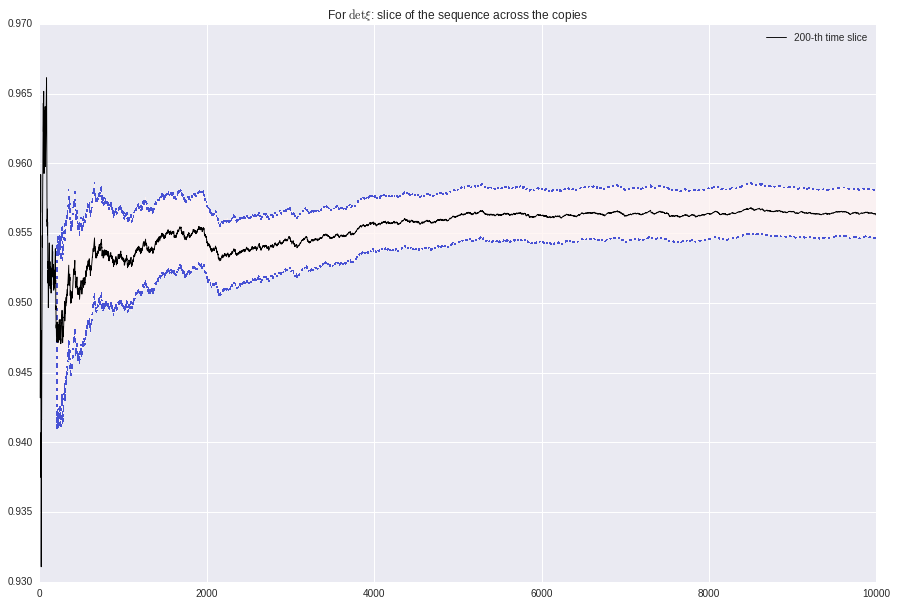

In [68]:
plt.figure(figsize=(15,10)) 
plot_single_sequence(df=trace, seq_no=200)
plt.title(r'For $\det \xi$: slice of the sequence across the copies')

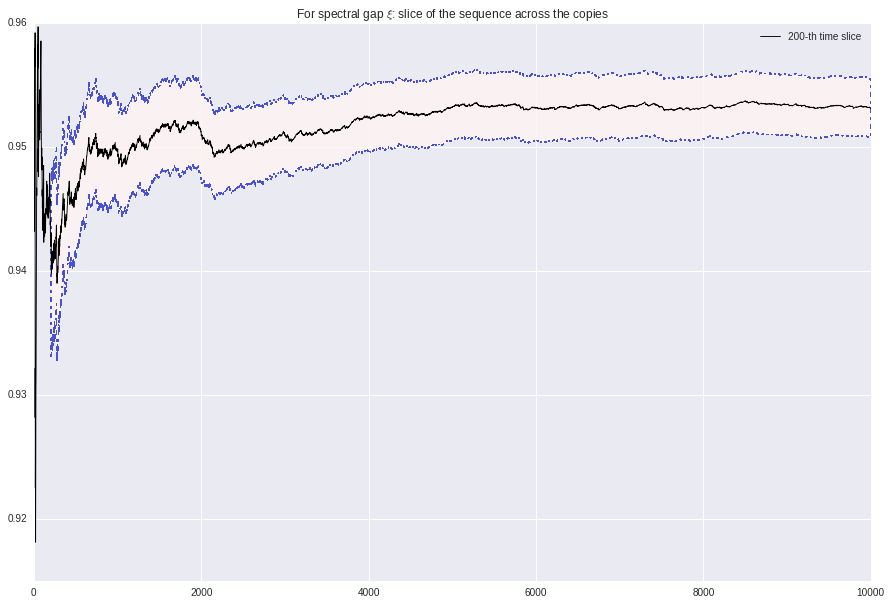

In [16]:
plt.figure(figsize=(15,10)) 
plot_single_sequence(df=spectral, seq_no=200)
plt.title(r'For spectral gap $\xi$: slice of the sequence across the copies')

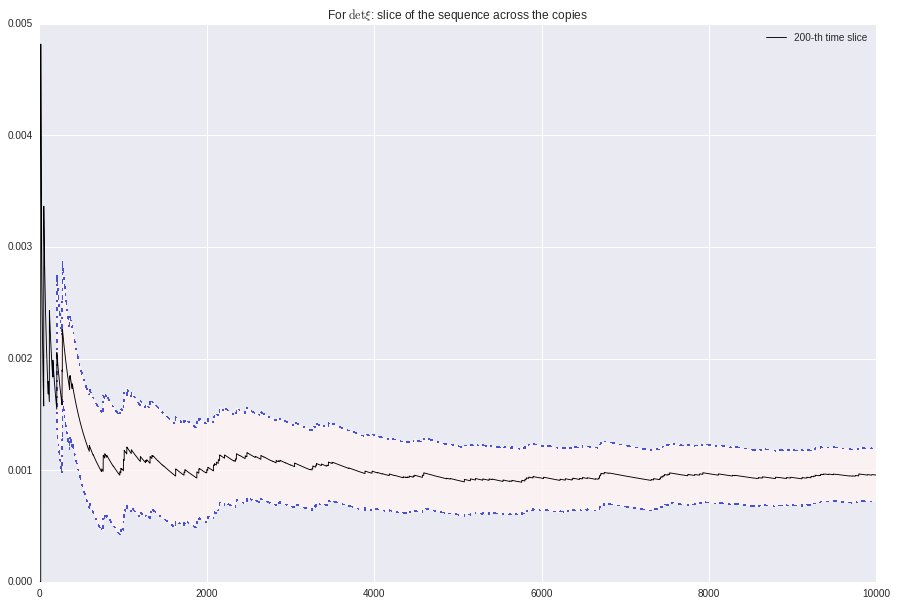

In [17]:
plt.figure(figsize=(15,10)) 
plot_single_sequence(df=determ, seq_no=200)
plt.title(r'For $\det \xi$: slice of the sequence across the copies')

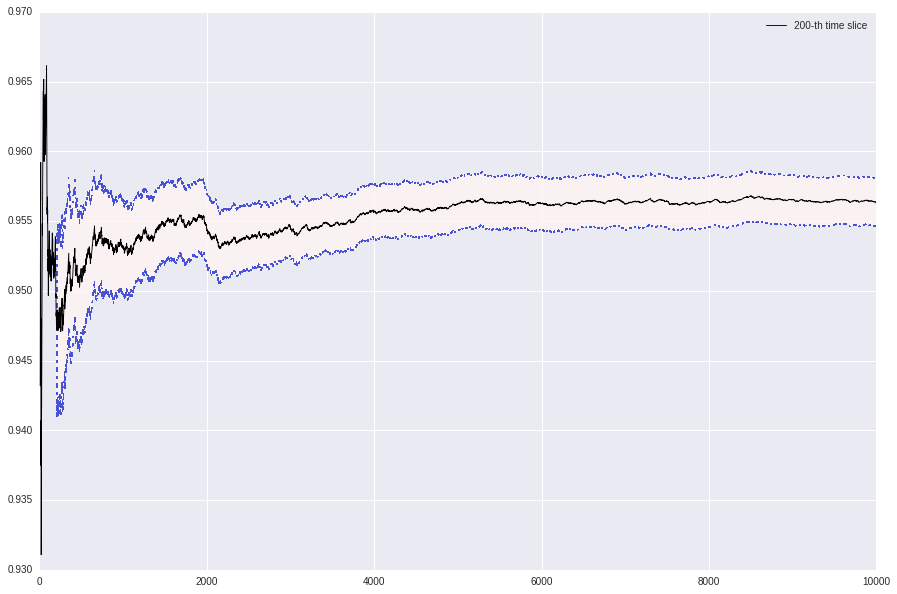

In [18]:
plt.figure(figsize=(15,10)) 
plot_single_sequence(df=trace, seq_no=200)

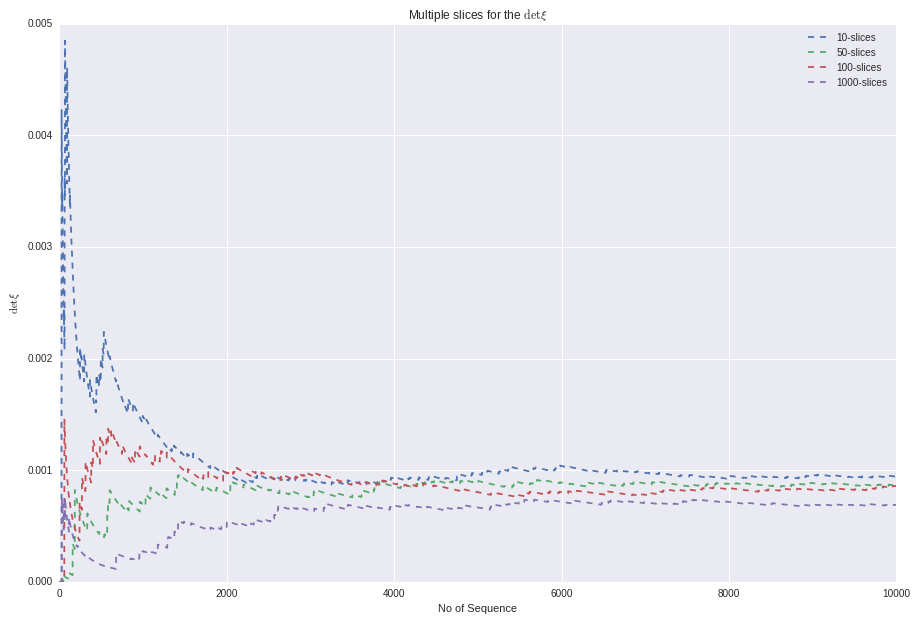

In [19]:
plt.figure(figsize=(15,10)) 
plot_set(determ)    
plt.xlabel('No of Sequence')
plt.ylabel(r'$\det \xi$')
plt.title(r'Multiple slices for the $\det \xi$ ')
plt.legend()
plt.savefig(figures_path+'DetXi_multiple_slices.png')   # save the figure to file

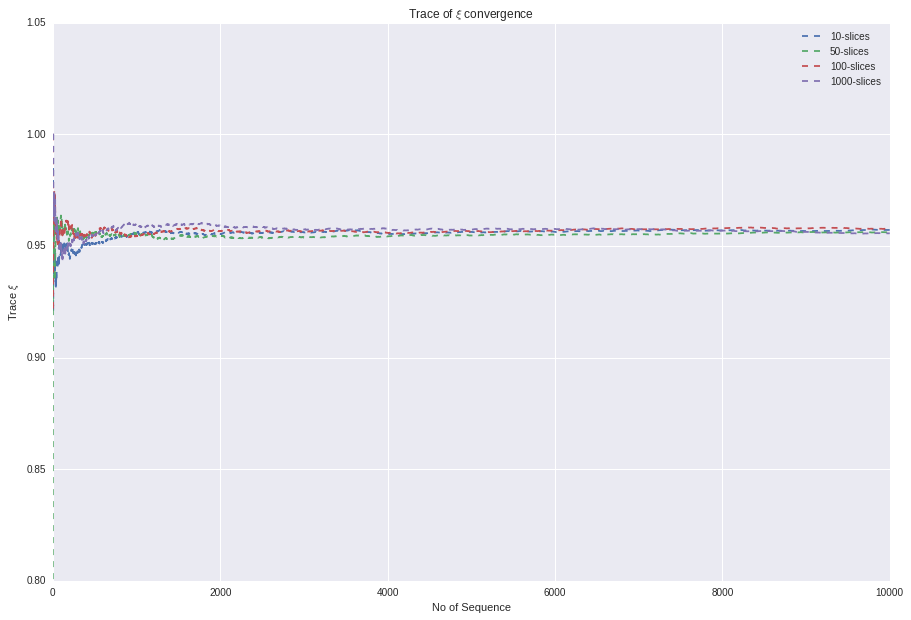

In [20]:
plt.figure(figsize=(15,10)) 
plot_set(trace)
plt.xlabel('No of Sequence')
plt.ylabel(r'Trace $\xi$')
plt.legend()
plt.title(r'Trace of $\xi$ convergence')
plt.savefig(figures_path+'trace_multiple_slices.png')   # save the figure to file

### Fischer Polar Coordinates

In [57]:
df=pd.DataFrame(dfs[2][2])
dfs[2][]

array([[    7.768,     2.147,     6.112],
       [   12.815,     0.324,     3.717],
       [   14.75 ,     2.021,     3.395],
       ...,
       [36260.921,     1.459,     3.17 ],
       [36169.985,     1.458,     3.17 ],
       [36247.779,     1.458,     3.17 ]])

In [54]:
dfs

[{'determ': array([[0.   , 0.   , 0.   , ..., 0.051, 0.064, 0.084],
         [0.   , 0.   , 0.   , ..., 0.073, 0.096, 0.106],
         [0.   , 0.   , 0.   , ..., 0.091, 0.091, 0.099],
         ...,
         [0.   , 0.   , 0.   , ..., 0.077, 0.103, 0.115],
         [0.   , 0.   , 0.   , ..., 0.097, 0.092, 0.092],
         [0.   , 0.   , 0.   , ..., 0.051, 0.068, 0.083]]),
  'spectral': array([[1.   , 1.   , 1.   , ..., 0.687, 0.608, 0.501],
         [1.   , 1.   , 1.   , ..., 0.552, 0.416, 0.36 ],
         [1.   , 1.   , 1.   , ..., 0.454, 0.458, 0.411],
         ...,
         [1.   , 1.   , 0.934, ..., 0.504, 0.324, 0.27 ],
         [0.775, 1.   , 0.869, ..., 0.405, 0.428, 0.426],
         [1.   , 1.   , 1.   , ..., 0.678, 0.596, 0.507]]),
  'trace': array([[1.   , 1.   , 1.   , ..., 0.822, 0.79 , 0.767],
         [1.   , 1.   , 1.   , ..., 0.773, 0.747, 0.743],
         [1.   , 1.   , 1.   , ..., 0.756, 0.758, 0.752],
         ...,
         [1.   , 1.   , 0.934, ..., 0.751, 0.718, 0.7

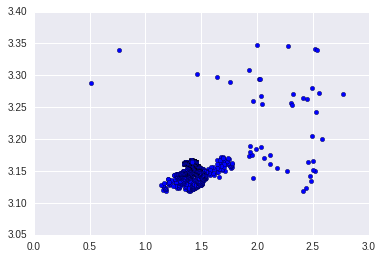

In [53]:
plt.scatter(phi1, phi2)

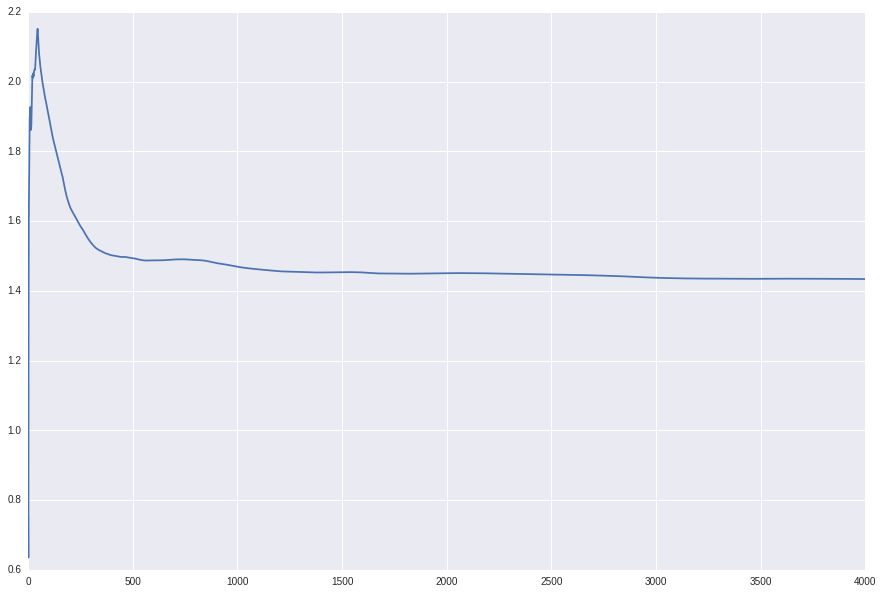

In [26]:
plt.figure(figsize=(15,10)) 
df=pd.DataFrame(dfs[2][2])
plt.plot(df[1].expanding().mean())

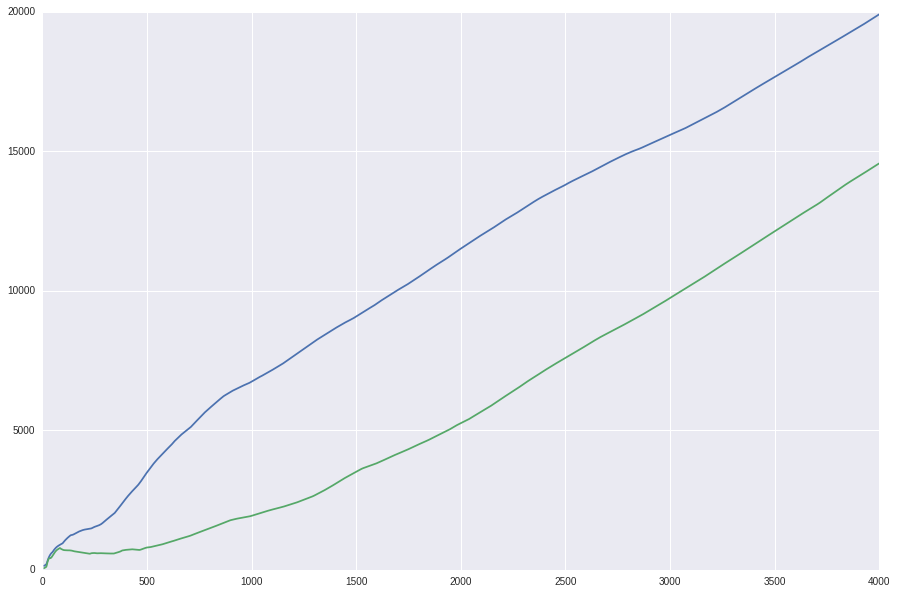

In [27]:
plt.figure(figsize=(15,10)) 
for i in range (0,2):
    plt.plot(pd.DataFrame(fischer_polar[i])[0].expanding(10).mean())

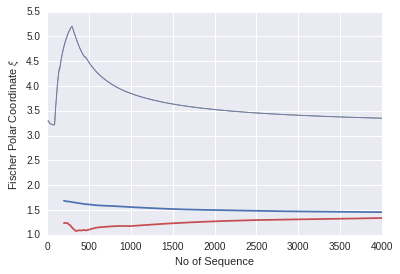

In [37]:
for i in range (0,2):
    plt.plot(pd.DataFrame(fischer_polar[i])[1].expanding(200).mean())
    plt.plot(y,linewidth=0.9)
    plt.xlabel('No of Sequence')
    plt.ylabel(r'Fischer Polar Coordinate of $\xi$')
    plt.savefig(figures_path+'fischer_polar_i_1.png')   # save the figure to file

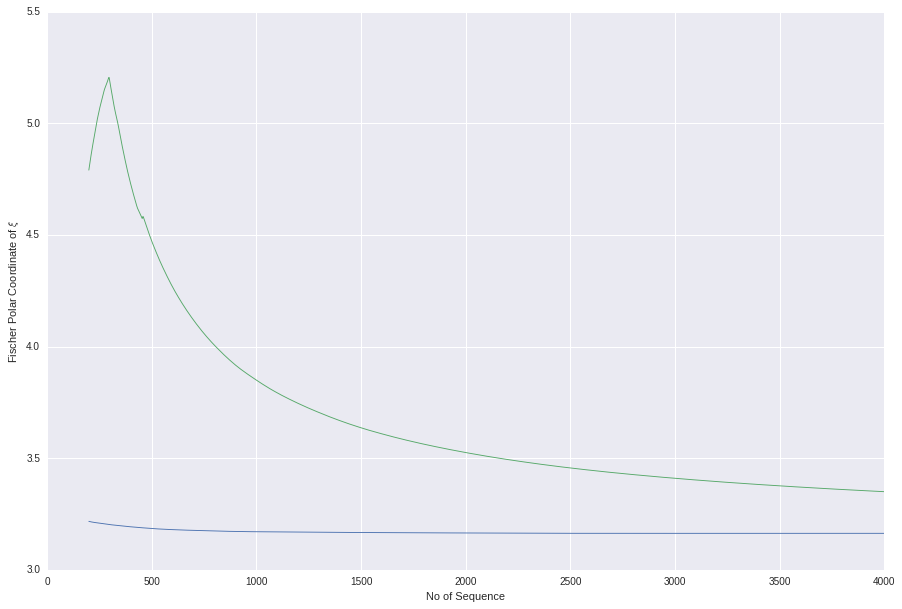

In [41]:
plt.figure(figsize=(15,10)) 
for i in range (0,2):
    df =pd.DataFrame(fischer_polar[i])[2]
    x= np.asarray(df.index)
    y = pd.DataFrame(fischer_polar[i])[2].expanding(200).mean()
    plt.plot(y,linewidth=0.9)
    plt.xlabel('No of Sequence')
    plt.ylabel(r'Fischer Polar Coordinate of $\xi$')
    plt.savefig(figures_path+'fischer_polar_i_2.png')   # save the figure to file


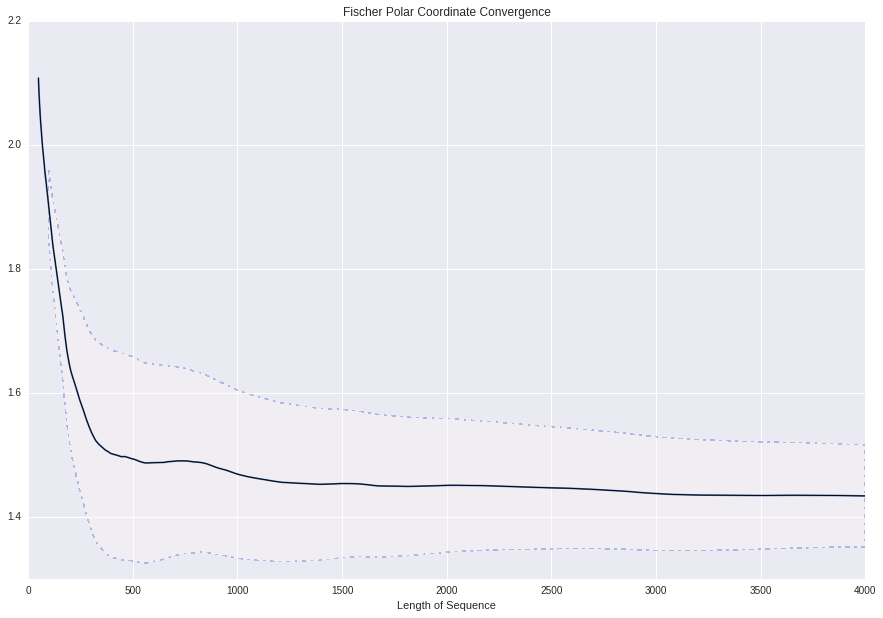

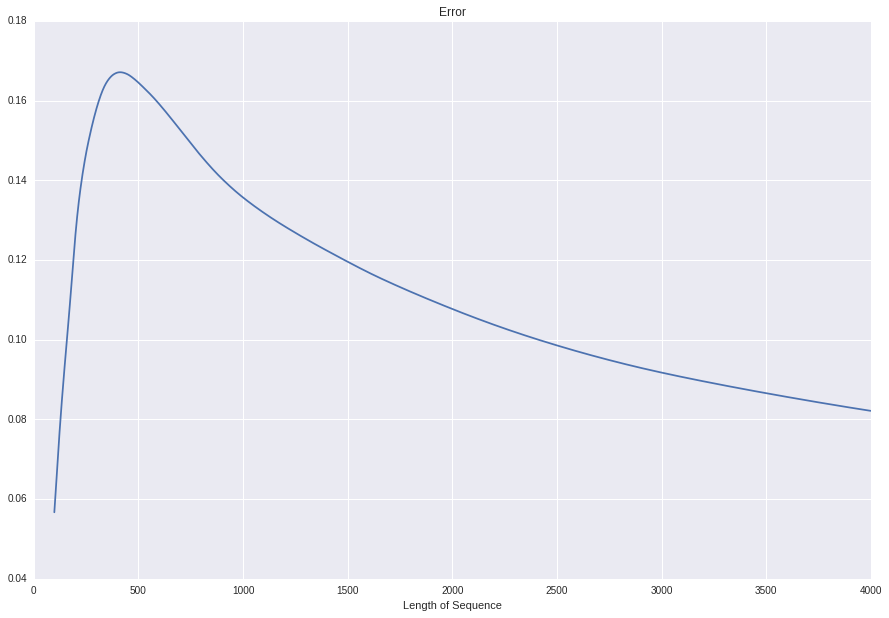

In [117]:
df =pd.DataFrame(fischer_polar[2])[1]
x= np.asarray(df.index)
plt.figure(figsize=(15,10))
y = df.expanding(50).mean()
plt.plot(y)
error=y.expanding(50).std()
plt.plot(x, y, 'k-',linewidth=0.9)
plt.fill_between(x, y-error, y+error, alpha=0.3, edgecolor='#1C3ACD', facecolor='#fff9f2',
                     linewidth=0.2, linestyle='dashdot', antialiased=False)
plt.title('Fischer Polar Coordinate Convergence')
plt.xlabel('Length of Sequence')
plt.savefig(figures_path+'fischer_polar_w_error.png')   # save the figure to file
plt.show()
plt.figure(figsize=(15,10))
plt.plot(error)
plt.title('Error')
plt.xlabel('Length of Sequence')
plt.savefig(figures_path+'error_fischer_polar.png')   # save the figure to file

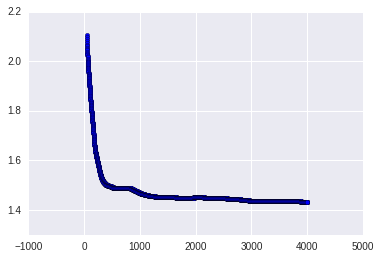

In [118]:
plt.scatter(x, y)

In [119]:
pd.DataFrame(dfs[1]['determ']).shape

(10000, 4000)

In [1]:
fischer_polar

NameError: name 'fischer_polar' is not defined